In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

observations_df = pd.read_csv('observations.csv', index_col='scientific_name')
observations_df.head()

,park_name,observations
scientific_name,,
Vicia benghalensis,Great Smoky Mountains National Park,68
Neovison vison,Great Smoky Mountains National Park,77
Prunus subcordata,Yosemite National Park,138
Abutilon theophrasti,Bryce National Park,84
Githopsis specularioides,Great Smoky Mountains National Park,85


In [15]:
species_info_df = pd.read_csv('species_info.csv', index_col='scientific_name')
species_info_df.head()


,category,common_names,conservation_status
scientific_name,,,
Clethrionomys gapperi gapperi,Mammal,Gapper's Red-Backed Vole,NaN
Bos bison,Mammal,"American Bison, Bison",NaN
Bos taurus,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
Ovis aries,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
Cervus elaphus,Mammal,Wapiti Or Elk,NaN


In [18]:
species_oberservation_join = pd.merge(species_info_df, observations_df, left_index=True, right_index=True)
species_oberservation_join.head(20)

,category,common_names,conservation_status,park_name,observations
scientific_name,,,,,
Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,NaN,Bryce National Park,109
Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,NaN,Yellowstone National Park,215
Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,NaN,Great Smoky Mountains National Park,72
Abies bifolia,Vascular Plant,Rocky Mountain Alpine Fir,NaN,Yosemite National Park,136
Abies concolor,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Great Smoky Mountains National Park,101
Abies concolor,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Bryce National Park,83
Abies concolor,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Yellowstone National Park,241
Abies concolor,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,Yosemite National Park,205
Abies fraseri,Vascular Plant,Fraser Fir,Species of Concern,Bryce National Park,109


In [24]:
species_observation_cat_count = species_oberservation_join.groupby('conservation_status').count()
species_observation_cat_count.head()

,category,common_names,park_name,observations
conservation_status,,,,
Endangered,80,80,80,80
In Recovery,24,24,24,24
Species of Concern,732,732,732,732
Threatened,44,44,44,44


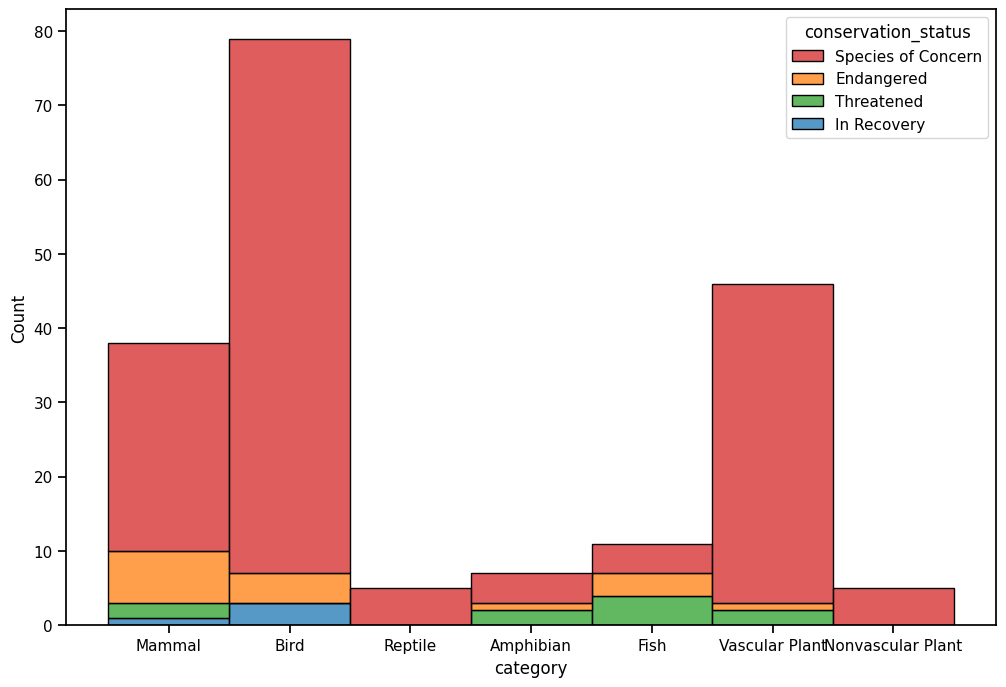

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
#palette = {'Blocker':'tab:red', 'Major':'tab:orange', 'Minor':'tab:green', 'Trivial':'tab:blue'}
palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
sns.set_context('notebook')
sns.histplot(data=species_info_df, x='category', hue='conservation_status', multiple='stack', palette=palette)
plt.savefig(fname='count_species_conserv_stat')